In [27]:
# https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/
import matplotlib
import PIL
import scipy
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.__version__, PIL.__version__,scipy.__version__

('3.5.0', '8.4.0', '1.7.3')

In [28]:
from matplotlib import image as img
image = img.imread('./Images/1.jpg')
image.shape

(720, 1280, 3)

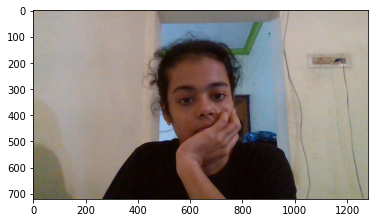

In [29]:
plt.imshow(image)
plt.show()

In [30]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [31]:
# import numpy as np
# r = np.array(r)
# g = np.array(g)
# b = np.array(b)
# type(r),type(g),type(b)

C:\Users\sinha\AppData\Local\Temp\ipykernel_16104\1120043795.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


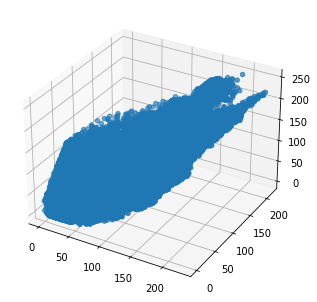

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [33]:
import pandas as pd
df = pd.DataFrame({'red': r,'blue': b,'green': g})

In [39]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.tail(10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
921590,-108,-123,-103,-1.353845,-1.587336,-1.364398
921591,-103,-118,-98,-1.291167,-1.522810,-1.298165
921592,-102,-113,-98,-1.278631,-1.458284,-1.298165
921593,-101,-112,-97,-1.266096,-1.445379,-1.284918
921594,-97,-110,-96,-1.215953,-1.419569,-1.271672
921595,-97,-110,-96,-1.215953,-1.419569,-1.271672
921596,-96,-113,-98,-1.203418,-1.458284,-1.298165
921597,-97,-116,-98,-1.215953,-1.497000,-1.298165
921598,-94,-114,-97,-1.178346,-1.471189,-1.284918
921599,-92,-114,-95,-1.153275,-1.471189,-1.258425


In [40]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 5)

In [36]:
print(cluster_centers)

[[-1.04504753 -1.18950389 -1.26905135]
 [-1.42105886  0.39955327  1.27185721]
 [ 1.44268761 -1.4378718  -1.07809776]
 [ 0.33752329  0.23311612  0.09026372]
 [ 1.31196848  1.11197444  0.91690723]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


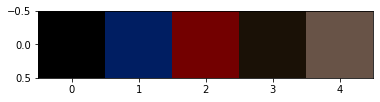

In [37]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()